# PHYS 3650L - Principles of Physics Laboratory III - Modern Physics
## Brownian Motion


**Objectives**. The objectives of this laboratory are
* to conduct a numerical simulation of a 2D and 3D Brownian Motion.
* to conduct a quantitative observation of a 2D Brownian Motion.
* to calculate Boltzmann constant and Avogadro number based on the statistical analysis of an observed Brownian Motion.



**Theory**.
Brownian motion is named after the botanist Robert Brown and describes the apparent random movement of small particles suspended in a fluid which  Brown observed in 1827 while looking through a microscope at pollen of the plant Clarkia pulchella immersed in water. The movement of the small particles was due to molecules of water hitting them. Because the molecules were not visible, it seemed that the larger visible particles were moving on their own. 
In 1905, almost eighty years later, theoretical physicist Albert Einstein published a paper where he modeled the motion of the pollen as being moved by individual water molecules, making one of his first major scientific contributions. This explanation of Brownian motion served as convincing evidence that atoms and molecules exist and was further verified experimentally by Jean Perrin in 1908. Perrin was awarded the Nobel Prize in Physics in 1926 "for his work on the discontinuous structure of matter". The direction of the force of atomic bombardment is constantly changing, and at different times the particle is hit more on one side than another, leading to the seemingly random nature of the motion.

The important implication of Einstein’s theory for subsequent experimental research was that he identified the diffusion constant D in terms of certain measurable properties of the particle (its radius) and of the medium (its viscosity and temperature), which allowed one to make predictions and hence to confirm or reject the hypothesized existence of the unseen molecules that were assumed to be the cause of the irregular Brownian motion.

>$$\frac{\overline{x^2}}{2t} = \mu k_{\rm {B}}T = \frac{\mu RT}{N_{\text{A}}}=\frac{RT}{6\pi \eta rN_{\text{A}}}$$

Here the first equality follows from the first part of Einstein's theory, the third equality follows from the definition of Boltzmann's constant as $k_B$ = $R$ / $N_A$, and the fourth equality follows from Stokes's formula for the mobility. By measuring the mean squared displacement over a time interval along with the universal gas constant $R$, the temperature $T$, the viscosity η, and the particle radius $r$, the Avogadro constant $N_A$ can be determined.


**Apparatus and experimental procedures**.
* Equipment.
    1. Polystyrene microspheres, 1μm.
    2. Distilled water.
    3. Microscope with a Motic X camera.
    4. Pipette.
    5. Small beaker.
    
* Experimental setup. A figure for the experimental setup will be provided by the student.
* Capabilities. Capabilities of the equipment items listed above will be provided by the student.
* Procedures. Detailed instructions are provided below.


**Requirements**.
* In the laboratory.
    1. Your instructor will introduce you to the equipment and software to be used in the experiment.
    2. Record the motion of the microshperes by using Motic X camera.
    3. Track the motion of a microsphere (you can track more than one) by using the Tracker program. Export the tracks as a text file. 
    4. Read the track data (your instructor will assist you in obtaining data files for your calculations).
    5. Your instructor will discuss methods to be used to prepare your data for plotting and analysis.
                            
* After the laboratory. The notebook with the completed items listed below will be turned in through D2L by the beginning of the next laboratory period. A complete laboratory report is not required for this experiment.

**Apparatus and experimental procedures**.
1. Provide a figure of the experimental apparatus.
2. Provide descriptions of the capabilities of equipment used in the experiment.

**Data**. Use Annex A for aalyzing data taken in the laboratory. The notebook will include:
1. Histograms of the displacements of a particle in $x$- and $y$- directions. 
2. Calculations of the mean, median, and standard deviation for the displacement in the $x$- and $y$- directions.
3. Calculations of the diffusion coefficient, Boltzmann's constant and Avogadro number.
4. Calculation of the percent discrepancy for the Avogadro number.
5. Plot of the particle's trajectory.
    

**Results and Conclusions**.
* **Results**.
    1. A statement providing the measured value of the Boltzmann's constant.
    2. A statement providing the measured value of the Avogadro number.
    3. A statement providing the percent discrepancy of the Boltzmann's constant and the Avogadro number.


* **Conclusions**.
    1. Assess the accuracy of your experiment.
    2. List the sources of error in the experiment.


** Useful tools **

In [31]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
from pylab import plot, show, grid, axis, xlabel, ylabel, title
#from IPython.display import Latex
from mpl_toolkits.mplot3d.axes3d import Axes3D
%matplotlib inline

In [32]:
"""
brownian() implements one dimensional Brownian motion (i.e. the Wiener process).
"""

# File: brownian.py



def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size = x0.shape + (n,), scale = delta*np.sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

** Numerical Simulation of 2D Brownian motion **

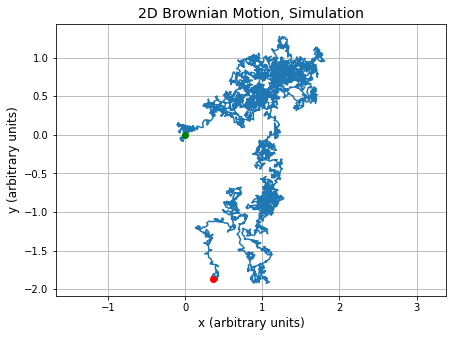

In [33]:
#Here we run a 2D Brownian motion simulator and plot the trajectory of a particle

# The Wiener process parameter.
delta = 0.5
# Total time.
T = 10.0
# Number of steps.
N = 5000
# Time step size
dt = T/N
# Initial values of x.
x = np.empty((2,N+1))
x[:, 0] = 0.0

brownian(x[:,0], N, dt, delta, out=x[:,1:])


# Plot the 2D trajectory.

plt.figure(figsize=(7,5))
plot(x[0],x[1])


# Mark the start (green) and end (red) points.
plot(x[0,0],x[1,0], 'go')
plot(x[0,-1], x[1,-1], 'ro')

# More plot decorations.
title('2D Brownian Motion, Simulation', fontsize=14)
xlabel('x (arbitrary units)', fontsize=12)
ylabel('y (arbitrary units)', fontsize=12)
axis('equal')
grid(True)
show()
 

** Statistics of 2D Simulation **

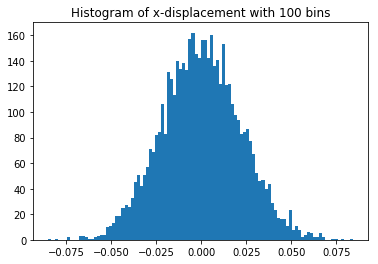

Mean displacement, x= 7.140693494793393e-05 , arbitrary units
Median displacement, x= -8.427662369325795e-05 , arbitrary units
Deviation, x= 0.021944365225277263 , arbitrary units


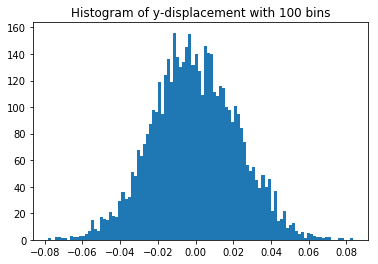

Mean displacement, y= -0.0003733330857554707 , arbitrary units
Median displacement, y= -0.0010799520256147277 , arbitrary units
Deviation, y= 0.02249996286774659 , arbitrary units


In [34]:
#Histogramming and statistics for 2D Simulation

deltax = np.empty(5000)
deltay = np.empty(5000)

for i in range(0,5000):
    xi = x[0,i]
    yi = x[1,i]
    xf = x[0,i+1]
    yf = x[1,i+1]
    deltax[i] = (xf-xi)
    deltay[i] = (yf-yi)
 
for i in range(0,5000):
    xi = x[0,i]
    xf = x[0,i+1]
    deltax[i] = (xf-xi)

        
#plt.hist(deltax, bins='auto')  # arguments are passed to np.histogram
plt.hist(deltax, bins=100)

plt.title("Histogram of x-displacement with 100 bins")
plt.show()

print ("Mean displacement, x=", np.mean(deltax), ", arbitrary units")
print ("Median displacement, x=", np.median(deltax), ", arbitrary units")
print ("Deviation, x=", np.std(deltax), ", arbitrary units")

plt.hist(deltay, bins=100)
plt.title("Histogram of y-displacement with 100 bins")
plt.show()

print ("Mean displacement, y=", np.mean(deltay), ", arbitrary units")
print ("Median displacement, y=", np.median(deltay), ", arbitrary units")
print ("Deviation, y=", np.std(deltay), ", arbitrary units")



** Numerical Simulation of 3D Brownian Motion **

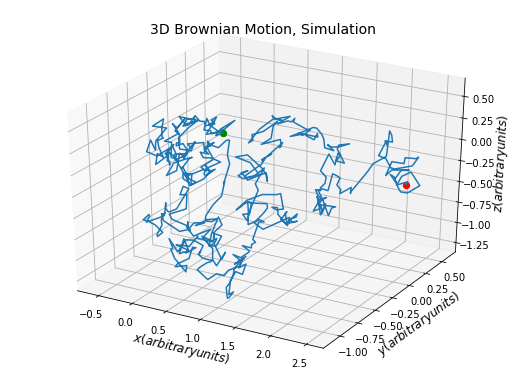

In [35]:
#Here we run a 3D Brownian motion simulator and plot the trajectory of a particle 

def Bm3D():
    delta = 0.5 # The Wiener process parameter.
    T = 10.0
    N = 500 # Number of steps.
    dt = T/N
    m = 5 # Number of "lines"
    x = np.empty((m,N+1))# Create an empty array to store the realizations.
    x[:, 0] =  0# Initial values of x.

    brownian(x[:,0], N, dt, delta, out=x[:,1:]) 

    t = np.linspace(0.0, T, N+1)   
    
    fig = plt.figure(figsize=(7,5))
    ax = Axes3D(fig)

    xdata, ydata, zdata = x[:3,:]
    ax.plot3D(xdata, ydata, zdata)
    ax.set_title('3D Brownian Motion, Simulation', fontsize=14)
    ax.set_xlabel('$x(arbitrary units)$', fontsize=12, rotation=150)
    ax.set_ylabel('$y(arbitrary units)$', fontsize=12)
    ax.set_zlabel('$z(arbitrary units)$', fontsize=12, rotation=60)
    ax.scatter(xdata[0], ydata[0], zdata[0], zdir='z', s=40, c='green', depthshade=True)  
    ax.scatter(xdata[-1], ydata[-1], zdata[-1], zdir='z', s=40, c='red', depthshade=True)
    show()
    
    return

Bm3D()

** 2D Brownian Motion, Experiment **

Number of tracking points= 113


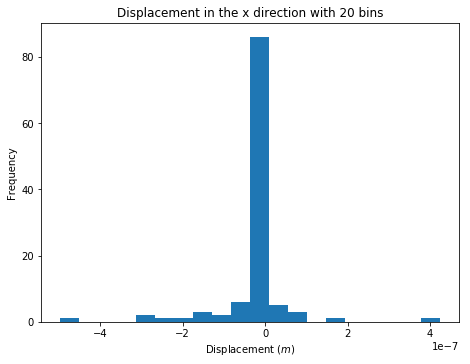

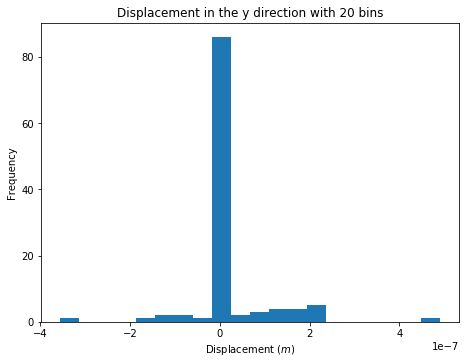

In [36]:
#Here we process experimental results

#First, we read the experimental data which welexported from Tracker into a text file (in this example Particle A2.txt)

datalist = np.loadtxt('Still_Another_Track.txt', skiprows = 2) # assuming you have time and step information on 2 separate lines 
                                      # and you do not want to read them

t, x, y = datalist[:,0], datalist[:,1], datalist[:,2] 


#Ckecking the number of tracking points

print ('Number of tracking points=', len(t))

#Setting the start time to zero and calculationg displacements in the x- and y-direction

tcorr=[]
deltax=[]
deltay=[]

for i in range(0,len(t)-1):

    tcorri=t[i+1]-t[i]
    tcorr.append(tcorri)
    
    deltaxi=x[i+1]-x[i]
    deltax.append(deltaxi)
    
    deltayi=y[i+1]-y[i]
    deltay.append(deltayi)

#Plotting a hystogram of displacements in the x direction 

plt.figure(figsize=(7.5,5.5))
plt.hist(deltax, bins=20)
plt.title("Displacement in the x direction with 20 bins")
plt.xlabel('Displacement ($m$)')
plt.ylabel('Frequency')
plt.show()


#Plotting a hystogram of displacements in the y direction

plt.figure(figsize=(7.5,5.5))
plt.hist(deltay, bins=20)
plt.title("Displacement in the y direction with 20 bins")
plt.xlabel('Displacement ($m$)')
plt.ylabel('Frequency')
plt.show()


In [37]:
#Calculating mean, median, and standard deviation for the displacement in x and y directions 

table = pd.DataFrame({'direction':['x-direction', 'y-direction'],
                      'mean displacement(m)': [np.mean(deltax), np.mean(deltay)],
                      'median displacement(m)': [np.median(deltax), np.median(deltay)],
                      'deviation(m)': [np.std(deltax), np.std(deltay)]
                     })

table


,direction,mean displacement(m),median displacement(m),deviation(m)
0,x-direction,-1.645873e-08,-6.205850e-10,8.578594e-08
1,y-direction,1.829034e-08,-2.972000e-10,8.747002e-08


In [38]:
#Calculating diffusion coefficient, D 

Dx=(np.std(deltax))**2/2.0/tcorri
Dy=(np.std(deltay))**2/2.0/tcorri
D= (Dx+Dy)/2

#Calculating Boltzmann's constant and Avogadro

Kbx=(np.std(deltax)**2)/2.0/tcorri*6.0*np.pi*0.5e-6*0.0091/295

Kby=(np.std(deltay)**2)/2.0/tcorri*6.0*np.pi*0.5e-6*0.0091/295

Kb=(Kbx+Kby)/2

table2 = pd.DataFrame({'direction':['x-direction', 'y-direction', 'average'],
                      'Diffusion coefficient ($m^2/s$)': [Dx, Dy, D],
                      'Boltzmann constant (J/K)': [Kbx, Kby, Kb]
                     })


table2


,direction,Diffusion coefficient ($m^2/s$),Boltzmann constant (J/K)
0,x-direction,1.103884e-13,3.209327e-23
1,y-direction,1.147651e-13,3.336570e-23
2,average,1.125767e-13,3.272949e-23


In [39]:
Navogadro=8.31/Kb

Disc=(Navogadro-6.022e+23)/6.022e+23*100

table3 = pd.DataFrame({'$N_A$': [Navogadro],
                       '%Disc': [Disc]
                     })

table3

,$N_A$,%Disc
0,2.538995e+23,-57.838012


** 2D trajectory, experiment **

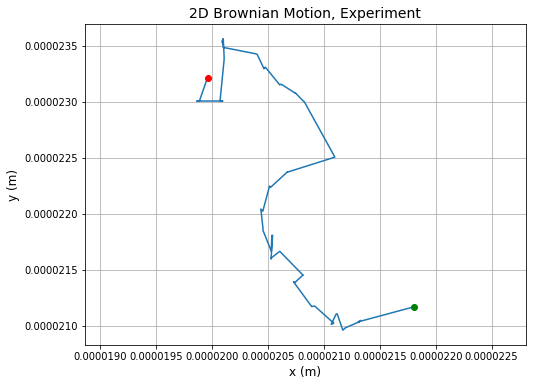

In [40]:
# Plot the 2D trajectory.
plt.figure(figsize=(7.9,5.9))
plot(x ,y)
# Mark the start and end points.
plot(x[0],y[0], 'go')
plot(x[-1], y[-1], 'ro')

# More plot decorations.
title('2D Brownian Motion, Experiment', fontsize=14)
xlabel('x (m)', fontsize=12)
ylabel('y (m)', fontsize=12)
axis('equal')
grid(True)
show()


**Results and Conclusions**